In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to SQLite 
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data 
sample_data = [
    ('Notebook', 10, 50.0),
    ('Pen', 25, 5.0),
    ('Pencil', 30, 3.0),
    ('Eraser', 20, 2.0),
    ('Marker', 15, 10.0),
    ('Notebook', 5, 50.0),
    ('Pen', 10, 5.0),
    ('Pencil', 5, 3.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()


In [3]:
# SQL query to calculate total quantity and revenue per product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

# Load the result into a DataFrame
df = pd.read_sql_query(query, conn)


In [4]:
print("Basic Sales Summary:\n")
print(df)

Basic Sales Summary:

    product  total_qty  revenue
0    Eraser         20     40.0
1    Marker         15    150.0
2  Notebook         15    750.0
3       Pen         35    175.0
4    Pencil         35    105.0


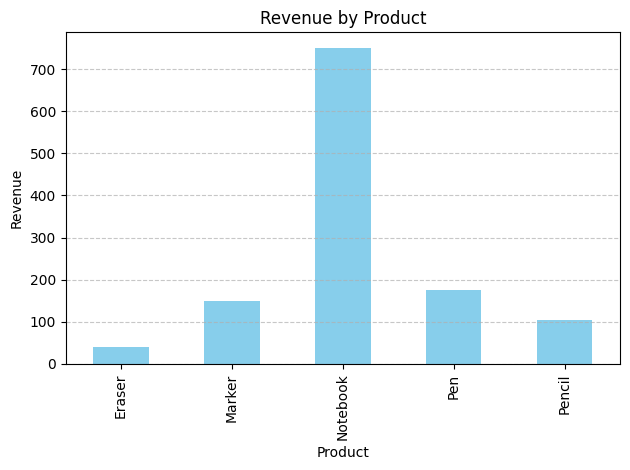

In [5]:
# bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("sales_chart.png")  # Optional: save the chart
plt.show()


In [ ]:
conn.close()